In [26]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
import joblib 

In [27]:
#Loading the dataset using Pandas
df = pd.read_csv("Car_processing_after_tfidf_context.csv" , delimiter= ",")


In [28]:
#Showing shape of the dataset
df.shape


(334851, 32)

In [29]:
#Showing names of columns
df.columns


Index(['Brand', 'Model', 'BodyType', 'Category', 'Drive', 'Doors', 'Km',
       'YearBuilt', 'Power_kW_HP', 'EngineCapacity', 'Cylinders',
       'EmptyWeight', 'EmissionClass', 'FuelType', 'Price', 'Seats',
       'FullServiceHistory', 'Transmission', 'Gears', 'CO2Emission', 'Color',
       'Warranty', 'APK', 'FuelConsumption', 'PreviousOwners', 'NonSmokingCar',
       'APK_month_diff', 'EngineCapacity_Corrected', 'A1', 'A2', 'A3', 'A4'],
      dtype='object')

In [30]:
#Showing numbers of each category in the BodyType column
df['BodyType'].value_counts()


BodyType
Hatchback               136643
SUV/Off-Road/Pick-Up     61351
Stationwagen             47809
MPV                      29720
Sedan                    20885
Bedrijfswagen            19752
Cabrio                   12134
Coupé                     5562
Overig                     989
Gesloten bestelwagen         4
Koel/geisoleerde             1
Combi/Van                    1
Name: count, dtype: int64

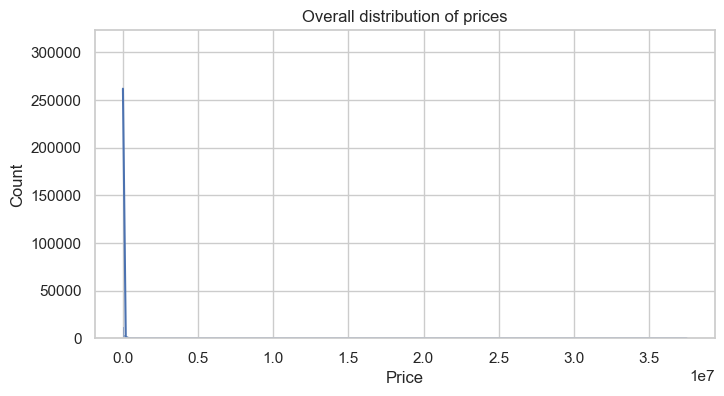

In [31]:
sns.set_theme(style="whitegrid") #Displaying histogram to show the overall distribution of prices
plt.figure(figsize=(8,4))
sns.histplot(data=df , x="Price" , kde= True)
plt.title("Overall distribution of prices")
plt.show()
#The compressed histogram indicates a highly skewed price distribution due to the presence of extreme high-priced vehicles.

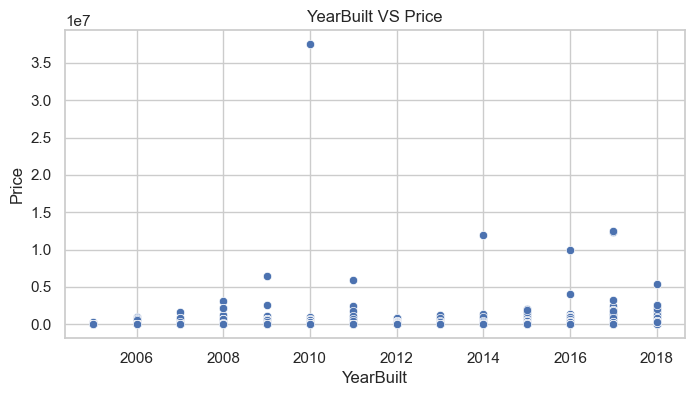

In [32]:
sns.set_theme(style = "whitegrid") #This scatter plot shows how a car’s manufacturing year affects its current price.
plt.figure(figsize =(8,4))
sns.scatterplot(x = "YearBuilt" , y= "Price" , data= df)
plt.title("YearBuilt VS Price")
plt.show()

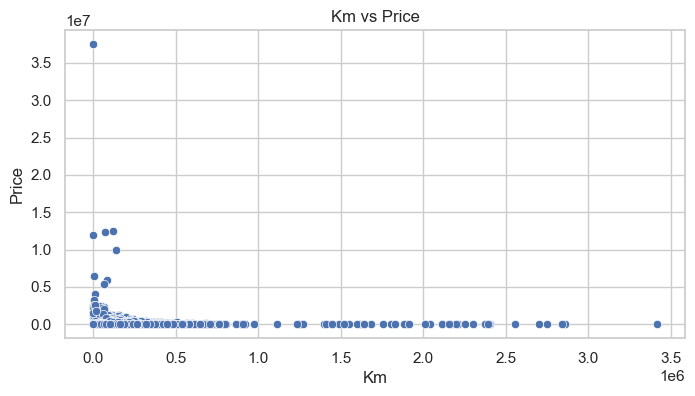

In [33]:
sns.set_theme(style="whitegrid") #This plot shows the relationship between kilometers driven and the current price of used cars.
plt.figure(figsize =(8,4))
sns.scatterplot(x = "Km" , y="Price" , data= df)
plt.title("Km vs Price")
plt.show()

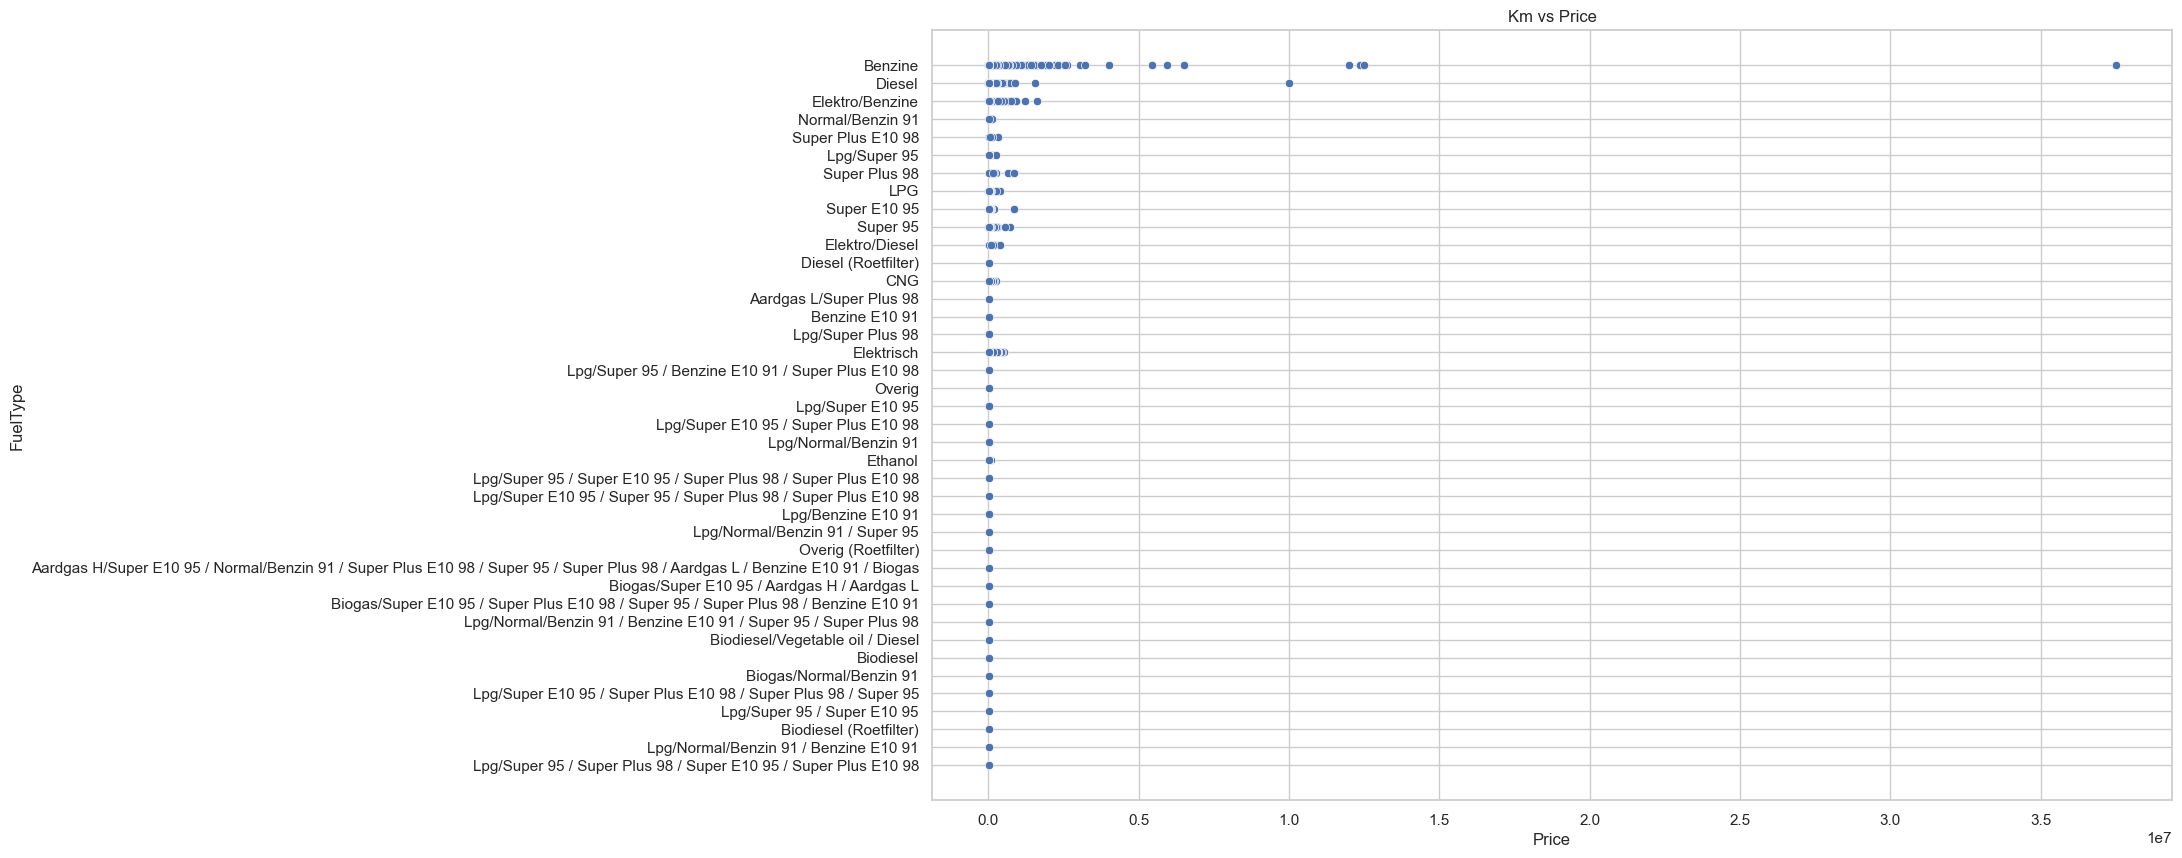

In [34]:
sns.set_theme(style = "whitegrid") #This box plot shows how car resale prices vary by fuel type.
plt.figure(figsize = (16,10))
sns.scatterplot(x = "Price" , y = "FuelType" , data = df)
plt.title("Km vs Price")
plt.show()

In [35]:
#Preprocessing
num_cols = ['Km', 'YearBuilt', 'Power_kW_HP', 'EngineCapacity', 'Cylinders', 'EmptyWeight', 'Price', 'Seats', 'Gears', 'CO2Emission', 'APK_month_diff', 'EngineCapacity_Corrected', 'A1', 'A2', 'A3', 'A4'
] #seperating numeric columns
cat_cols = ['Brand', 'Model', 'FuelType'] #seperating text columns

In [36]:
#using for loop to  fill missing values in num_cols by using median
for col in num_cols :
    df[col] = df[col].fillna(df[col].median())

In [37]:
#using for loop again to fill missing values in cat_cols 
for col in cat_cols :
    df[col] = df[col].fillna("Unknown") 

In [38]:
#Feature Engineering
#adding another column so that the model can work better 
df['Vehicle_age'] = 2026 - df['YearBuilt']

In [39]:
#seperating X and Y
features = num_cols + cat_cols + ['Vehicle_age']
X = df[features]
Y = df['BodyType']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [41]:
#Column Transformer
preprocessor = ColumnTransformer(
    transformers= [
    ('num' , StandardScaler() , num_cols) ,
    ('cat' , OneHotEncoder(handle_unknown = 'ignore' , sparse_output = False) , cat_cols)])

In [42]:
# Logistic Regression model with preprocessing (scaling + encoding)
lr_model = Pipeline(steps=[
    ('prep' , preprocessor),
    ('clf' , LogisticRegression)
])

In [43]:
#RandomForest Classifier model with preprocessing (scaling + encoding)
rf_model = Pipeline(steps=[
    ('prep' , preprocessor),
    ('clf' , RandomForestClassifier)
])

In [44]:
#LinearSVC model with preprocessing (scaling + encoding)
svc_model = Pipeline(steps=[
    ('prep' , preprocessor),
    ('clf' , LinearSVC)
])

In [45]:
# Fit and transform training data
X_train_processed = preprocessor.fit_transform(X_train)
# Transform testing data
X_test_processed = preprocessor.transform(X_test)

In [21]:
#LogisticRegression model training and testing
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_processed , y_train)
y_pred = lr_model.predict(X_test_processed)
#Predicting accuracy , Classification report , Confusion matrix
acc = accuracy_score(y_test , y_pred)
print("Accuracy score:" , round(acc , 3))
cr = classification_report(y_test , y_pred)
print("Classification report:" , cr)
cm = confusion_matrix(y_test , y_pred)
print("Confusion matrix:" , cm)

Accuracy score: 0.869


C:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

Classification report:                       precision    recall  f1-score   support

       Bedrijfswagen       0.97      0.98      0.98      3950
              Cabrio       0.89      0.87      0.88      2404
               Coupé       0.81      0.71      0.75      1058
Gesloten bestelwagen       0.00      0.00      0.00         2
           Hatchback       0.87      0.94      0.91     27199
                 MPV       0.90      0.82      0.86      6075
              Overig       0.53      0.13      0.21       206
SUV/Off-Road/Pick-Up       0.94      0.99      0.96     12296
               Sedan       0.72      0.55      0.62      4141
        Stationwagen       0.74      0.67      0.70      9640

            accuracy                           0.87     66971
           macro avg       0.74      0.66      0.69     66971
        weighted avg       0.86      0.87      0.86     66971

Confusion matrix: [[ 3859    26     5     0     5     9    14    26     0     6]
 [    3  2087   122     0

In [22]:
#RandomForest model training and testing
rf_model =  RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_processed , y_train)
y_pred = rf_model.predict(X_test_processed)
#Predicting accuracy , Classification report , Confusion matrix
acc = accuracy_score(y_test , y_pred)
print("Accuracy score:" , round(acc , 3))
cr = classification_report(y_test , y_pred)
print("Classification report:" , cr)
cm = confusion_matrix(y_test , y_pred)
print("Confusion matrix:" , cm)

Accuracy score: 0.929


C:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

Classification report:                       precision    recall  f1-score   support

       Bedrijfswagen       0.97      0.99      0.98      3950
              Cabrio       0.94      0.92      0.93      2404
               Coupé       0.88      0.80      0.84      1058
Gesloten bestelwagen       0.00      0.00      0.00         2
           Hatchback       0.93      0.98      0.95     27199
                 MPV       0.93      0.86      0.89      6075
              Overig       0.86      0.18      0.30       206
SUV/Off-Road/Pick-Up       0.94      0.99      0.97     12296
               Sedan       0.90      0.74      0.81      4141
        Stationwagen       0.89      0.85      0.87      9640

            accuracy                           0.93     66971
           macro avg       0.83      0.73      0.76     66971
        weighted avg       0.93      0.93      0.93     66971

Confusion matrix: [[ 3920     2     0     0     2     3     2    20     0     1]
 [    5  2201    81     0

In [23]:
#LinearSVC model training and testing
svc_model = LinearSVC()
svc_model.fit(X_train_processed , y_train)
y_pred = svc_model.predict(X_test_processed)
#Predicting accuracy , Classification report , Confusion matrix
acc = accuracy_score(y_test , y_pred)
print("Accuracy score:" , round(acc , 3))
cr = classification_report(y_test , y_pred)
print("Classification report:" , cr)
cm = confusion_matrix(y_test , y_pred)
print("Confusion matrix:" , cm)

Accuracy score: 0.858


C:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Classification report:                       precision    recall  f1-score   support

       Bedrijfswagen       0.97      0.98      0.98      3950
              Cabrio       0.86      0.82      0.84      2404
               Coupé       0.77      0.53      0.63      1058
Gesloten bestelwagen       0.00      0.00      0.00         2
           Hatchback       0.86      0.95      0.90     27199
                 MPV       0.90      0.79      0.84      6075
              Overig       0.44      0.02      0.04       206
SUV/Off-Road/Pick-Up       0.93      0.99      0.96     12296
               Sedan       0.68      0.52      0.59      4141
        Stationwagen       0.74      0.62      0.67      9640

            accuracy                           0.86     66971
           macro avg       0.72      0.62      0.65     66971
        weighted avg       0.85      0.86      0.85     66971

Confusion matrix: [[ 3878    19     0     0     3    13     2    33     0     2]
 [    2  1982   150     0

C:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [51]:
from joblib import load

model = load("model.pkl")
print(model)
#The trained model was saved using Joblib and later successfully loaded.The output confirmed that the object is a Scikit-learn Pipeline, which verifies that the model was saved correctly and is functional.

<class 'sklearn.pipeline.Pipeline'>
